In [7]:
import MySQLdb
import re
import pandas as pd
import numpy as np
import datetime
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import preprocessing

In [2]:
conn = MySQLdb.connect(host='54.65.19.253', port=3306, user='news', passwd='newsnews', db='news')
data = pd.read_sql('SELECT * \
                   FROM gbp_pred;', conn)
conn.close()

In [3]:
data['gbp_gradient_binary_pred'] = data['gbp_gradient_binary_pred'].astype(int)
#data['time'] = [datetime.fromtimestamp(i).strftime('%Y-%m-%d') for i in (data['timestamp'].astype(int)).as_matrix()]
data.head()

,timestamp,gbp,gbp_gradient,gbp_gradient_binary,gbp_gradient_binary_pred
0,946656000,1.615700,-0.000700,0,0
1,946742400,1.615000,0.005512,1,0
2,946828800,1.626724,0.011001,1,1
3,946915200,1.637002,0.005804,1,1
4,947001600,1.638331,0.005379,1,0


In [4]:
data = data[data['timestamp'] >= 1483228800]

In [43]:
x = data['timestamp'].as_matrix()
y = data['gbp'].as_matrix()
#y= data['gbp_gradient'].as_matrix()
# = np.gradient(y)
acc = (data['gbp_gradient_binary'] - data['gbp_gradient_binary_pred']).as_matrix()
acc = np.where(acc == 0, 1, 0)

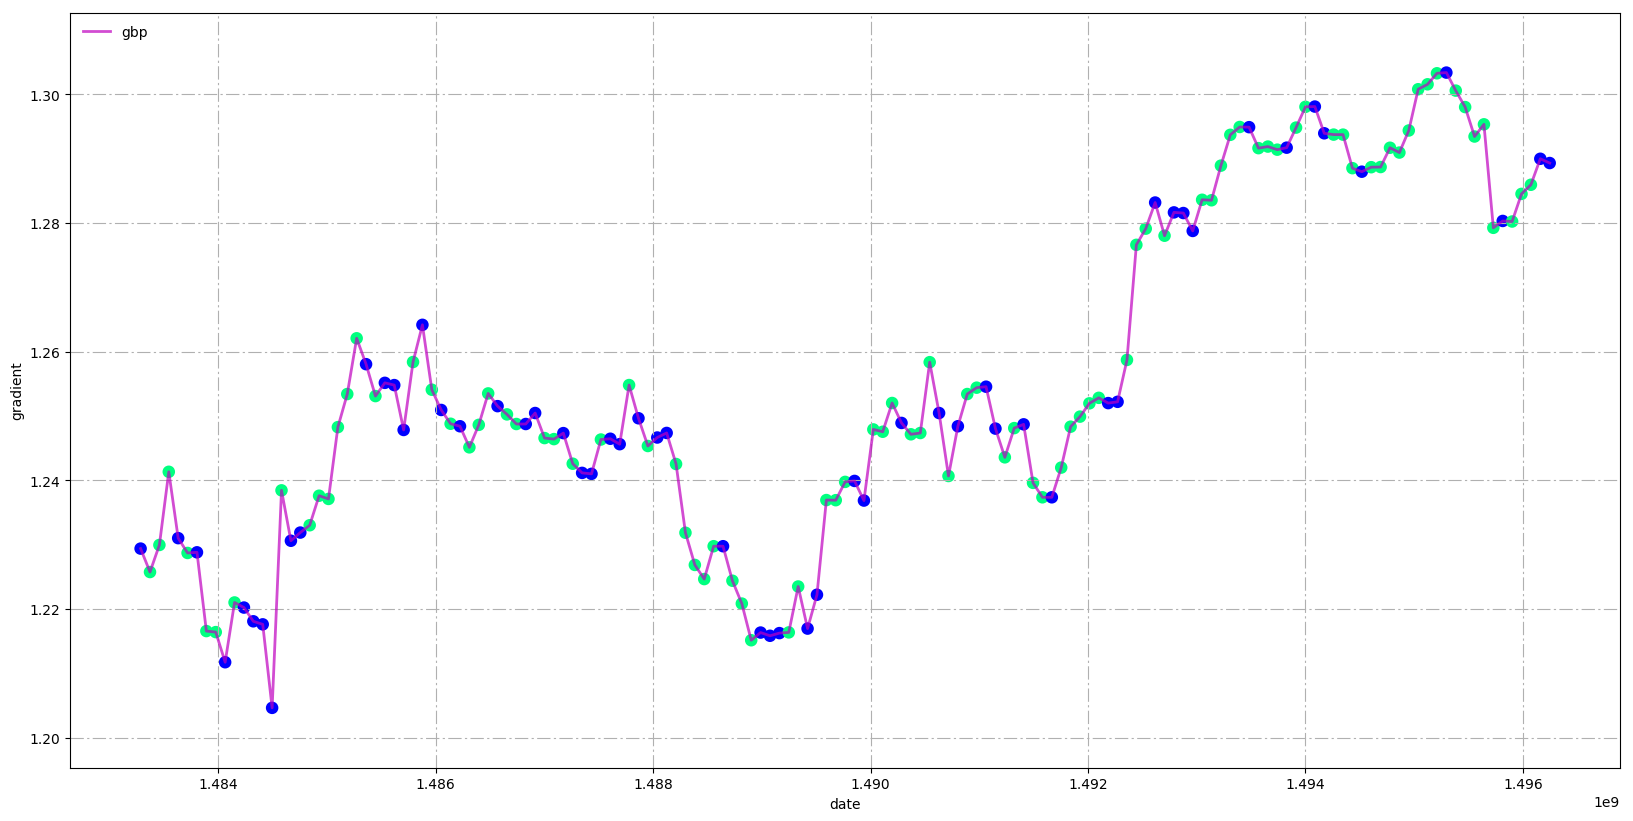

In [47]:
fig = plt.figure(figsize=(20,10), dpi=100, facecolor='white')
ax = fig.gca()
plt.ylabel('gradient')
plt.xlabel('date')
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')
plt.scatter(x, y, c=acc, cmap='winter', linewidths=3)
plt.plot(x, y, color="m", linewidth=2, linestyle="-", label="gbp", alpha=0.7)
plt.grid()
#plt.plot(x, xau, color="green", linewidth=2, linestyle="-", label="xau", alpha=0.7)
plt.legend(loc='upper left', frameon=False)
#plt.ylim(y.min()*2, y.max()*2)
plt.show()

In [48]:
fig.savefig('gbp.png', dpi=fig.dpi)